
# 🎬 시나리오 기반 머신러닝 미션: 마케팅 전략과 건강 예측의 과학

당신은 데이터 과학자로 고용된 **헬스&뷰티 스타트업**의 분석 팀장입니다.  
회사의 마케팅 부서는 **광고 예산이 매출에 어떤 영향을 주는지**를 알고 싶어 하고,  
제품 개발 부서는 **사용자의 건강 데이터를 기반으로 당뇨병 위험군을 조기에 예측**하고자 합니다.

이번 프로젝트의 목표는 다음과 같습니다:

- 📈 **광고 채널별 효과 분석**을 통해 최적의 마케팅 예산 배분 전략을 수립한다.
- 🧪 **정규화 회귀 모델**을 통해 중요하지 않은 변수를 제거하고 모델 해석력을 높인다.
- ❤️ **건강 진단 데이터**를 통해 당뇨병 고위험군을 조기에 예측하여 건강 서비스를 제안한다.

이 시나리오를 바탕으로 실제 데이터를 분석하고 예측 모델을 만들어봅시다!


## 🎯 미션 1: 선형회귀 (Linear Regression)

설명: TV, 라디오, 신문 광고 예산에 따른 제품 매출을 예측하는 선형 회귀 모델을 만들어보세요.

데이터: Advertising.csv (TV, Radio, Newspaper, Sales)

지시사항:

1. 데이터셋을 불러오고 탐색하세요.

2. TV, Radio, Newspaper를 feature로 하여 Sales를 예측하는 선형 회귀 모델을 만들어보세요.

3. 예측 정확도를 R² score로 확인하세요.

4. 각 feature의 계수를 해석해보세요.




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 로드
# 데이터 URL
url = "https://raw.githubusercontent.com/chandanverma07/DataSets/master/Advertising.csv"

# 데이터 불러오기
df = pd.read_csv(url)

# print(df.head())

# 독립변수, 종속변수 설정
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

result = model.predict(X_test)

print("R^2 score:", r2_score(y_test, result))

# correlation matrix
corr = df.corr()
print(df[['TV', 'radio', 'newspaper', 'sales']].corr())



R^2 score: 0.899438024100912
                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000



## 🎯 미션 1-2: 릿지 회귀 (Ridge Regression)

**설명**: L2 정규화를 통해 과적합을 방지하고 모델의 안정성을 확보합니다.
설명: 같은 데이터를 사용하되 릿지 회귀로 정규화 효과를 확인해보세요.

지시사항:

1. 동일한 feature로 릿지 회귀 모델을 학습시키되, alpha 값을 [0.01, 1, 100]로 설정해 비교하세요.

2. 각 모델의 계수 변화와 R² 점수를 시각화하세요.

3. 어떤 alpha 값이 가장 좋은 성능을 보였는지 해석해보세요.


R^2 score (alpha=0.01): 0.8994380249089621
R^2 score (alpha=1): 0.89943810463304
R^2 score (alpha=100): 0.8994433694759678


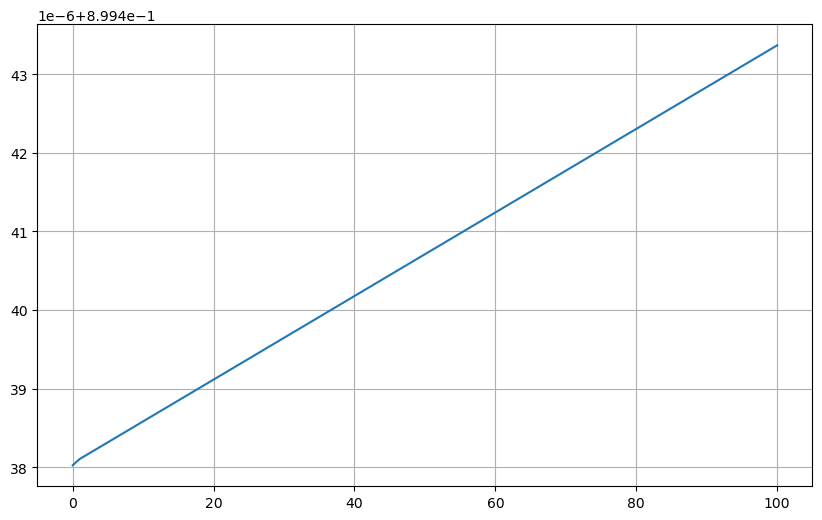

0.8994433694759678 100


In [4]:
from sklearn.linear_model import Ridge

alphas = [0.01, 1, 100]
r2_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"R^2 score (alpha={alpha}):", r2_score(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))


#visualize the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores)
plt.grid(True)
plt.show()

print(max(r2_scores), alphas[r2_scores.index(max(r2_scores))])

In [ ]:
alphas = []
i = 147 #147과 150사이에서 변곡점 발생 관측
while i < 150:
    alphas.append(round(i, 3))  
    i += 0.01  

r2_scores = []

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

maximum = max(r2_scores)
print(maximum, alphas[r2_scores.index(maximum)])

0.8994440144538838 149.12


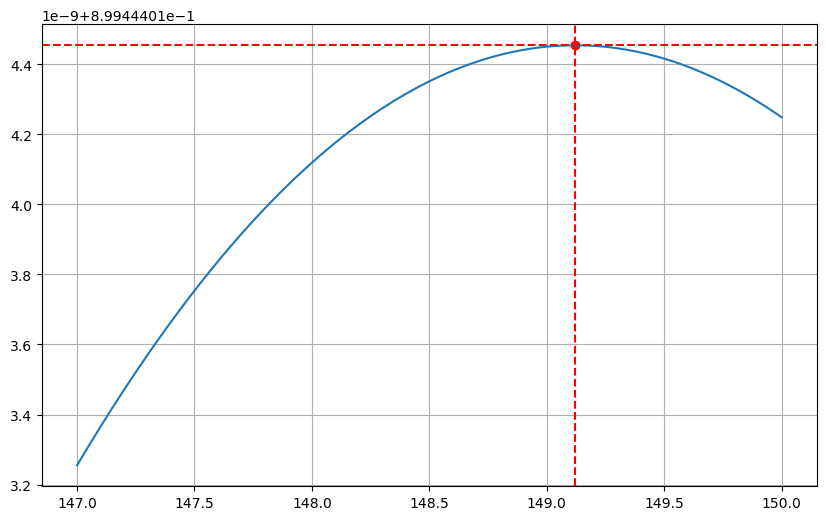

0.8994440144538838 149.12


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores)
plt.axhline(y=maximum, color='r', linestyle='--')
plt.axvline(x=alphas[r2_scores.index(maximum)], color='r', linestyle='--')
plt.scatter(alphas[r2_scores.index(maximum)], maximum, color='red')
plt.grid(True)
plt.show()

print(max(r2_scores), alphas[r2_scores.index(max(r2_scores))])


## 🎯 미션 1-3: 라쏘 회귀 (Lasso Regression)


설명: Lasso 회귀는 불필요한 feature의 계수를 0으로 만드는 특성이 있습니다.

지시사항:

1. alpha 값을 [0.01, 1, 100]로 조절하여 Lasso 회귀 모델을 학습시키세요.

2. 계수가 0이 되는 feature가 있는지 확인하고 시각화하세요.

3. 어떤 변수가 모델에서 제외되었는지 해석해보세요.


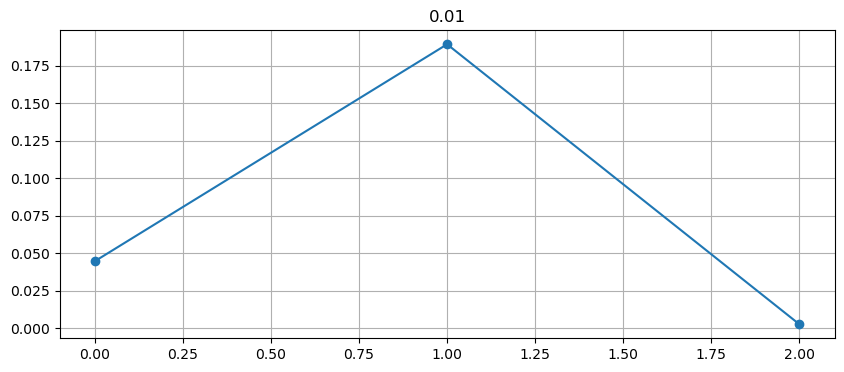

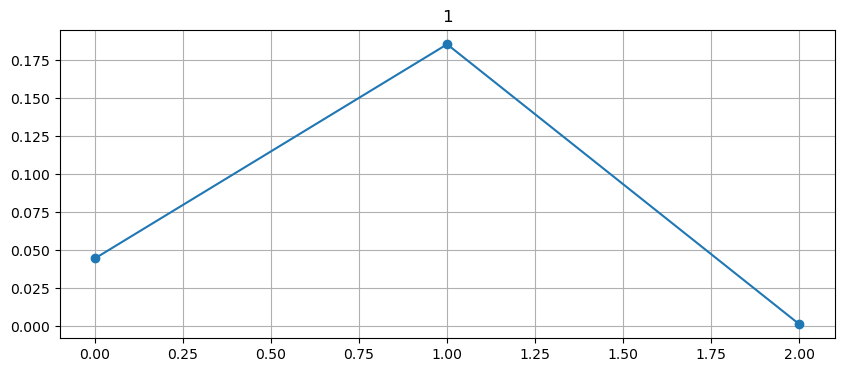

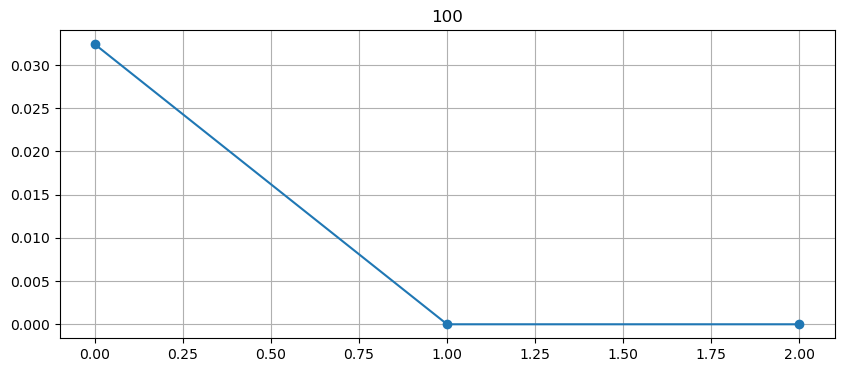

In [7]:
from sklearn.linear_model import Lasso
alphas = [0.01, 1, 100]
coef_dict = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train, y_train)
    coef = lasso.coef_
    coef_series = pd.Series(coef, index=X.columns)
    coef_dict[alpha] = coef_series

    # 계수 시각화
    plt.figure(figsize=(10, 4))
    plt.plot(coef_series.values, marker='o')
    plt.title(f"{alpha}")
    plt.grid(True)
    plt.show()

In [8]:
for alpha in alphas:
    coef_series = coef_dict[alpha]
    zero_coef_features = coef_series[coef_series == 0].index.tolist()

    print(f"\n[α = {alpha}]")
    print("0이 된 계수 개수:", len(zero_coef_features))
    print("제외된 feature:")
    print(zero_coef_features)



[α = 0.01]
0이 된 계수 개수: 0
제외된 feature:
[]

[α = 1]
0이 된 계수 개수: 0
제외된 feature:
[]

[α = 100]
0이 된 계수 개수: 2
제외된 feature:
['radio', 'newspaper']
